In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [21]:
df = pd.read_csv("/home/hadiii/python3/FuelConsumption.csv")
display(df.head(10))
display(df.describe())
from sklearn.pipeline import Pipeline

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [22]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
display(cdf.head(10))
display(cdf.describe())

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


<function matplotlib.pyplot.show(close=None, block=None)>

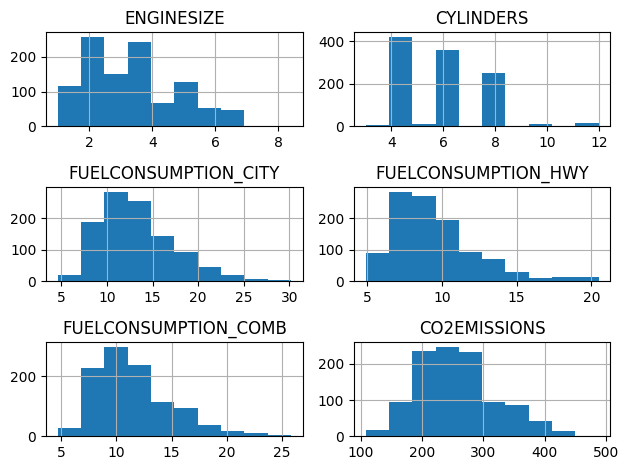

In [23]:
viz = cdf.hist()
plt.tight_layout()
plt.show

In [24]:
np.random.seed(42)
train, test = train_test_split(cdf, test_size=0.2, random_state=42)

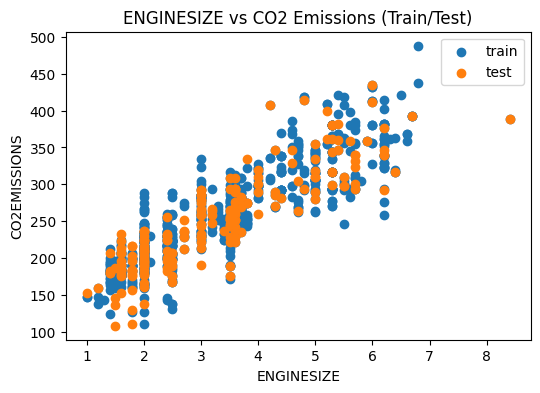

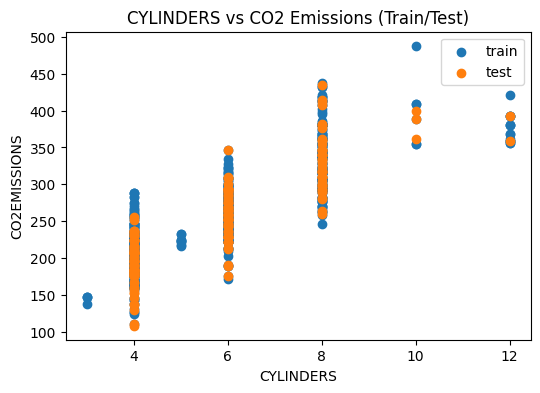

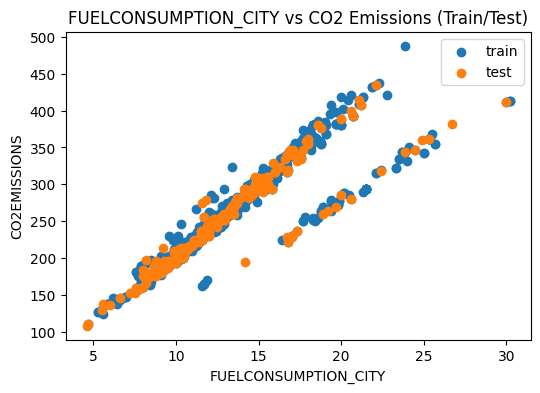

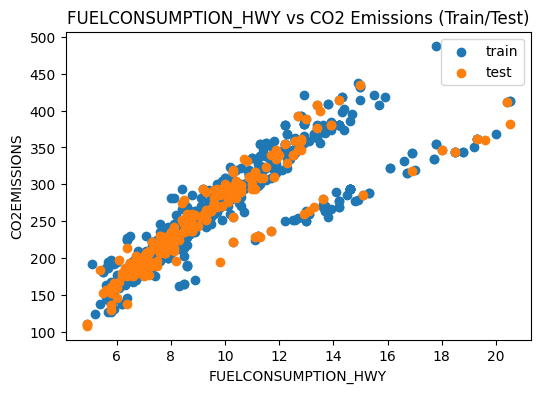

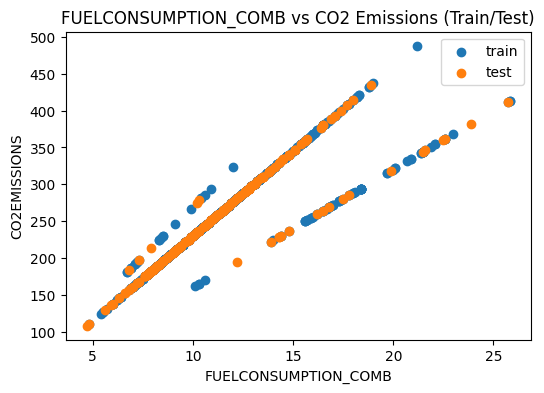

In [25]:
features = [
    'ENGINESIZE',
    'CYLINDERS',
    'FUELCONSUMPTION_CITY',
    'FUELCONSUMPTION_HWY',
    'FUELCONSUMPTION_COMB'
]

for col in features:
    plt.figure(figsize=(6, 4))

    plt.scatter(train[col], train['CO2EMISSIONS'],
                label='train', alpha=1)

    plt.scatter(test[col], test['CO2EMISSIONS'],
                label='test', alpha=1)

    plt.xlabel(col)
    plt.ylabel("CO2EMISSIONS")
    plt.legend()
    plt.title(f"{col} vs CO2 Emissions (Train/Test)")
    plt.show()

In [27]:
features = [
    'ENGINESIZE',
    'CYLINDERS',
    'FUELCONSUMPTION_CITY',
    'FUELCONSUMPTION_HWY',
    'FUELCONSUMPTION_COMB'
]
target = 'CO2EMISSIONS'

X_train = train[features].values
y_train = train[target].values.ravel()
X_test  = test[features].values
y_test  = test[target].values.ravel()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_hat = pipeline.predict(X_test)

y_hat_train = pipeline.predict(X_train)


def regression_metrics(y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return {'R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}

metrics_train = regression_metrics(y_train, y_hat_train)
metrics_test  = regression_metrics(y_test,  y_hat)

print("=== EVALUATION (primary: TEST) ===\n")
print("-> TEST metrics (this is the primary y_hat):")
for k, v in metrics_test.items():
    print(f"{k}: {v:.6f}")

print("\n-> TRAIN metrics (for reference / overfitting check):")
for k, v in metrics_train.items():
    print(f"{k}: {v:.6f}")

linear = pipeline.named_steps['reg']
coefs = linear.coef_.ravel()
intercept = linear.intercept_

print("\n\n=== MODEL COEFFICIENTS (LinearRegression) ===")
print(f"Intercept: {intercept:.6f}")
for name, coef in zip(features, coefs):
    print(f"{name}: {coef:.6f}")

results = pd.DataFrame({
    'actual': y_test,
    'predicted': y_hat
})
results['residual'] = results['actual'] - results['predicted']

print("\n\n=== Sample of predictions (test set) ===")
print(results.head())

=== EVALUATION (primary: TEST) ===

-> TEST metrics (this is the primary y_hat):
R2: 0.876331
MSE: 511.365219
RMSE: 22.613386
MAE: 16.689747

-> TRAIN metrics (for reference / overfitting check):
R2: 0.860675
MSE: 553.988100
RMSE: 23.536952
MAE: 16.976022


=== MODEL COEFFICIENTS (LinearRegression) ===
Intercept: 257.256741
ENGINESIZE: 15.895452
CYLINDERS: 12.723005
FUELCONSUMPTION_CITY: -33.797142
FUELCONSUMPTION_HWY: -21.126992
FUELCONSUMPTION_COMB: 87.663340


=== Sample of predictions (test set) ===
   actual   predicted   residual
0     304  303.736100   0.263900
1     221  240.449529 -19.449529
2     294  273.506952  20.493048
3     221  236.274284 -15.274284
4     207  204.812442   2.187558
